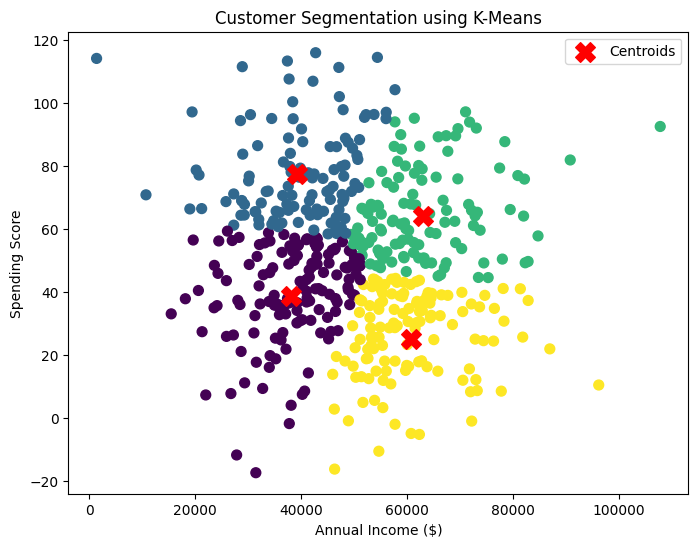

Cluster Centers (Centroids):
[[-0.80016712 -0.46017604]
 [-0.71787855  1.09971515]
 [ 0.87158874  0.55579272]
 [ 0.72122686 -1.00494351]]

Sample customer data with assigned clusters:
         Income  Spending Score  Cluster
0  57450.712295       73.154439        2
1  47926.035482       97.735416        1
2  59715.328072       15.035811        3
3  72845.447846       64.074231        2
4  46487.699379       33.733936        0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Simulate a dataset with customer data
np.random.seed(42)
n_customers = 500
income = np.random.normal(50000, 15000, n_customers)  # Simulated annual income
spending_score = np.random.normal(50, 25, n_customers)  # Simulated spending score

# Create a DataFrame
df = pd.DataFrame({
    'Income': income,
    'Spending Score': spending_score
})

# Standardize the data (important for K-Means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply K-Means clustering (let's assume 4 clusters for customer segmentation)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(df['Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0] * 15000 + 50000, kmeans.cluster_centers_[:, 1] * 25 + 50, 
            marker='X', color='red', s=200, label='Centroids')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

# Print cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

# Show a few rows of the customer segments
print("\nSample customer data with assigned clusters:")
print(df.head())
